# Loan Level

2. What does the data look like?
1. Do we actually have every loan for a given pool?

In [1]:
import os
os.chdir("/home/charles/src/LondonMirror/Prepayments/")

import prepayments as pp
import numpy as np
import pandas as pd
import ggplot as gg
import datetime

import tables

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
ll = pp.gnm_data.GNM_II_LL()

Get 10000 samples to look at in R

In [4]:
samples = ll.get_samples(10000)

In [24]:
samples.shape

(10000, 33)

In [5]:
samples.head()

,,agency,annual_mip,buy_down_status,credit_score,current_month_liquidation,down_payment_assistance,first_payment_date,first_time,issuer_id,loan_age,...,property_type,refinance_type,remaining_loan_term,removal_reason,seller_issuer_id,state,total_debt_expense_ratio,upb,upb_at_issuance,upfront_mip
dsn,as_of_date,,,,,,,,,,,,,,,,,,,,,
1500179385,2014-05-01,F,1250,False,664,False,False,2013-07-01,True,3355,11,...,1,blank,349,blank,0,AZ,4248,14792590,15100000,1750
1010831970,2016-10-01,F,1200,False,645,False,False,2013-01-01,False,3355,46,...,1,blank,307,blank,0,GA,0,31386031,34600000,1750
1010892867,2014-03-01,F,550,False,0,False,False,2012-12-01,False,4049,16,...,1,Streamlined,344,blank,0,MD,0,25224877,25900000,10
1018032296,2014-04-01,F,550,False,655,False,False,2010-07-01,True,3355,46,...,1,blank,291,blank,0,OK,0,12522468,13800000,2250
1011254315,2015-04-01,F,550,False,758,False,False,2010-02-01,False,3355,63,...,1,blank,297,blank,0,WA,0,17856102,20000000,1750


In [8]:
samples.columns

Index([u'agency', u'annual_mip', u'buy_down_status', u'credit_score',
       u'current_month_liquidation', u'down_payment_assistance',
       u'first_payment_date', u'first_time', u'issuer_id', u'loan_age',
       u'loan_gross_margin', u'loan_interest_rate', u'loan_origination_date',
       u'loan_purpose', u'ltv', u'maturity_date', u'months_delinquent',
       u'months_prepaid', u'number_of_borrowers', u'original_loan_term',
       u'original_principal_balance', u'origination_type', u'pool_id',
       u'property_type', u'refinance_type', u'remaining_loan_term',
       u'removal_reason', u'seller_issuer_id', u'state',
       u'total_debt_expense_ratio', u'upb', u'upb_at_issuance',
       u'upfront_mip'],
      dtype='object')

Switch zeros to NAs where appropriate.

A blank credit score can mean < 300, > 850, or the record is from before feb. 2011.

In [28]:
samples.credit_score.where(samples.credit_score > 0, np.NaN, inplace=True)

In [44]:
samples.loan_origination_date.where(~(samples.loan_origination_date == pd.Timestamp("1970-01-01")),
                                    np.NaN, inplace=True)

In [48]:
samples.ltv.where(~(samples.ltv == 0), np.NaN, inplace=True)

Maturity date is screwed up.

In [54]:
samples.original_loan_term.where(~(samples.original_loan_term==0), np.NaN, inplace=True)

In [62]:
samples.original_principal_balance.where(samples.original_principal_balance==0).dropna()

Series([], Name: original_principal_balance, dtype: float64)

In [74]:
samples.origination_type.where(~(samples.origination_type=='blank'),np.NaN, inplace=True)

In [80]:
samples.property_type.where(~(samples.property_type==0), np.NaN, inplace=True)

In [86]:
samples.loan_purpose.where(~(samples.loan_purpose=='blank'), np.NaN, inplace=True)

In [85]:
samples.refinance_type.where(~(samples.refinance_type=='blank'), np.NaN, inplace=True)

In [91]:
samples.removal_reason.where(~(samples.removal_reason=='blank'), np.NaN, inplace=True)

Total debt expense is censored for values of < 10% or > 65%.

In [94]:
samples.total_debt_expense_ratio.where(~(samples.total_debt_expense_ratio==0), np.NaN, inplace=True)

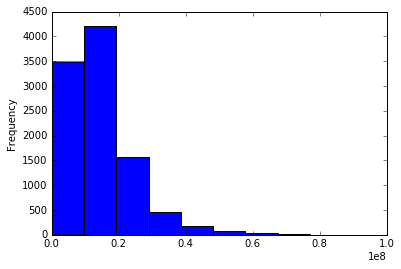

In [95]:
samples.upb.plot(kind='hist')

In [96]:
samples.upb.value_counts()[0]

1353

UPB blank for first 6 months (seasoning)

In [97]:
samples.ix[samples.upb==0,'current_month_liquidation'].value_counts()

False    1343
True       10
Name: current_month_liquidation, dtype: int64

In [98]:
samples.upb.where(~(samples.upb==0), np.NaN, inplace=True)

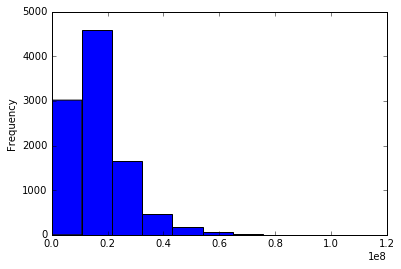

In [99]:
samples.upb_at_issuance.plot(kind='hist')

In [111]:
samples.upb_at_issuance.where(~(samples.upb_at_issuance==0), np.NaN, inplace=True)

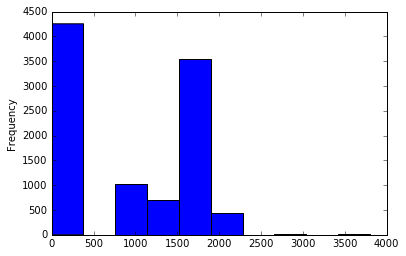

In [112]:
samples.upfront_mip.plot(kind='hist')

Now, did any records with missing data have a prepayment event?

In [109]:
samples.dropna().current_month_liquidation.value_counts()

Series([], Name: current_month_liquidation, dtype: int64)

Not all NAs are missing data. bad test.

Now, what's up with maturity date?

In [120]:
pd.Timestamp.fromtimestamp(ll.loans_table[0]['as_of_date'])

Timestamp('2013-10-01 00:00:00')

In [123]:
pd.Timestamp.fromtimestamp(ll.loans_table[0]['maturity_date'])

Timestamp('2022-05-01 00:00:00')

In [124]:
samples.maturity_date.tail()

dsn         as_of_date
1502823888  2016-12-01   1903-09-25 16:31:44
1500585181  2014-04-01   1907-05-25 16:31:44
1013582990  2014-10-01   1905-10-25 17:31:44
1015811547  2014-12-01   1905-06-25 16:31:44
1501970839  2015-03-01   1908-04-25 16:31:44
Name: maturity_date, dtype: datetime64[ns]

In [125]:
test_str = "LAE602515028238882936V232014120120391101042500001320000000013200000           30000429600                   517NN          2 1PA     3N 201503"

In [126]:
test_str_split = {k:test_str.__getslice__(*v) for k,v in ll.LOAN_DEF.items()}
test_str_split['maturity_date']

'20391101'

In [129]:
m_dt = ll.parse_entry(test_str_split['maturity_date'],'maturity_date', ll.Loans)

In [130]:
pd.Timestamp.fromtimestamp(m_dt)

Timestamp('2039-11-01 00:00:00')

Seems to work fine. Maybe it's something I fixed. I note that I'm storing 32 bit time, and this is beyond the epoch.

In [131]:
import time
time.strptime(test_str_split['maturity_date'], "%Y%m%d")

time.struct_time(tm_year=2039, tm_mon=11, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=305, tm_isdst=-1)

In [133]:
time.mktime(time.strptime(test_str_split['maturity_date'], "%Y%m%d"))

float

In [193]:
for row in ll.loans_table.where("maturity_date < 0"):
    jim = row
    break

In [136]:
jim['maturity_date']

-1962408496

In [137]:
jim['dsn']

1021331278

In [138]:
pd.Timestamp.fromtimestamp(jim['as_of_date'])

Timestamp('2013-10-01 00:00:00')

Look that up in the file

In [139]:
correct_maturity = pd.Timestamp("2043-12-01")

Unix epoch ends @ $2^{31}-1$, it takes 1 digit to clock over, so corrected number is $2*(2^{31}) + ts$, where ts is the overflowed timestamp. I.e. $2^{32}+ts$

In [194]:
pd.Timestamp.fromtimestamp(2**32 + jim['maturity_date'])

Timestamp('2043-12-01 00:00:00')

In [195]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1500179385, 2014-05-01 00:00:00) to (1501970839, 2015-03-01 00:00:00)
Data columns (total 33 columns):
agency                        10000 non-null object
annual_mip                    10000 non-null int32
buy_down_status               10000 non-null bool
credit_score                  8167 non-null float64
current_month_liquidation     10000 non-null bool
down_payment_assistance       10000 non-null bool
first_payment_date            10000 non-null datetime64[ns]
first_time                    10000 non-null bool
issuer_id                     10000 non-null int16
loan_age                      10000 non-null int16
loan_gross_margin             10000 non-null int32
loan_interest_rate            10000 non-null float64
loan_origination_date         1458 non-null datetime64[ns]
loan_purpose                  9704 non-null object
ltv                           8949 non-null float64
maturity_date                 10000 non-null dat

In [197]:
samples.loan_age.min()

0

In [198]:
ll.pools_table

/pools (Table(1328177,), shuffle, blosc(9)) 'Mortgage Pool Information'
  description := {
  "as_of_date": Time32Col(shape=(), dflt=0, pos=0),
  "cusip": StringCol(itemsize=9, shape=(), dflt='', pos=1),
  "issue_type": EnumCol(enum=Enum({'X': 0, 'C': 1, 'M': 2}), dflt='X', base=Int8Atom(shape=(), dflt=0), shape=(), pos=2),
  "issuer_id": Int16Col(shape=(), dflt=0, pos=3),
  "pool_id": StringCol(itemsize=6, shape=(), dflt='', pos=4),
  "pool_issue_date": Time32Col(shape=(), dflt=0, pos=5),
  "pool_type": StringCol(itemsize=3, shape=(), dflt='', pos=6)}
  byteorder := 'little'
  chunkshape := (2259,)

### Extract origination date

In [205]:
jim = samples.ix[~(samples.loan_origination_date.isnull()), 
                 ['loan_age', 'loan_origination_date']].reset_index()
jim.head()

,dsn,as_of_date,loan_age,loan_origination_date
0,1504796751,2015-10-01,1,2015-08-24
1,1503974816,2015-12-01,6,2015-05-05
2,1505809926,2016-07-01,3,2016-03-24
3,1503782198,2016-05-01,12,2015-04-30
4,1504757078,2016-04-01,6,2015-08-17


In [204]:
from pandas.tseries.offsets import MonthBegin

In [220]:
tim = pd.Series({i:(pd.Timestamp(v['as_of_date'])-MonthBegin(v['loan_age']+1) - 
        (v['loan_origination_date'] - MonthBegin())).days for i,v in jim.iterrows()})
tim[:5]

0     0
1     0
2     0
3     0
4    31
dtype: int64

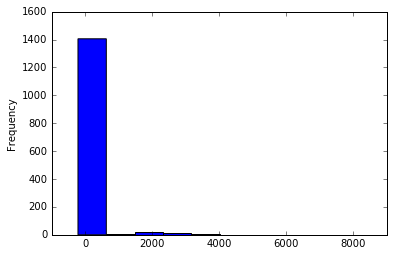

In [221]:
pd.Series(tim).plot(kind='hist')

In [225]:
tim[(tim == max(tim))]

1243    8247
dtype: int64

In [226]:
jim.ix[1243]

dsn                               1504742769
as_of_date               2015-11-01 00:00:00
loan_age                                   2
loan_origination_date    1993-01-15 00:00:00
Name: 1243, dtype: object

In [227]:
jim.ix[1243,['as_of_date', 'loan_origination_date']].diff()

as_of_date                     NaT
loan_origination_date   -8325 days
Name: 1243, dtype: timedelta64[ns]

In [228]:
8325/30.

277.5

In [230]:
samples.ix[jim.ix[1243,['dsn','as_of_date']]].T

dsn,1504742769
as_of_date,2015-11-01
agency,F
annual_mip,0
buy_down_status,False
credit_score,NaN
current_month_liquidation,False
down_payment_assistance,True
first_payment_date,2015-10-01 00:00:00
first_time,False
issuer_id,1997


Ah-hah. nonHAMPmod. Do all loans with origination_date have modifications?

In [231]:
samples.ix[~(samples.loan_origination_date.isnull()), 'loan_purpose'].value_counts()

Purchase      871
Refinance     499
HAMPmod        56
nonHAMPmod     32
Name: loan_purpose, dtype: int64

Nope.

In [232]:
1e-3*3875

3.875

In [233]:
dmr = pp.bloomberg_data.Mortgage_Rate_Data()

In [234]:
dmr.get_rate_for_loan_age(0,pd.Timestamp("2010-01-01"))

4.9800000000000004

In [235]:
samples.columns

Index([u'agency', u'annual_mip', u'buy_down_status', u'credit_score',
       u'current_month_liquidation', u'down_payment_assistance',
       u'first_payment_date', u'first_time', u'issuer_id', u'loan_age',
       u'loan_gross_margin', u'loan_interest_rate', u'loan_origination_date',
       u'loan_purpose', u'ltv', u'maturity_date', u'months_delinquent',
       u'months_prepaid', u'number_of_borrowers', u'original_loan_term',
       u'original_principal_balance', u'origination_type', u'pool_id',
       u'property_type', u'refinance_type', u'remaining_loan_term',
       u'removal_reason', u'seller_issuer_id', u'state',
       u'total_debt_expense_ratio', u'upb', u'upb_at_issuance',
       u'upfront_mip'],
      dtype='object')

In [237]:
isinstance(ll.loans_table[50]['as_of_date'], np.int32)

True

In [238]:
jim = ll.loans_table[97878316]
jim

(0, 1350, 1420088400, 0, 731, 0, 0, 1500161863, 1372651200, 0, 3355, 19, 0, 3250.0, 18000, 1, 9650, -1978223296, 0, 1, 1, 360, 16100000, 2, 'MA1089', 1, 0, 337, 0, 0, 'IN', 1752, 15451339, 16100000, 1750)

In [243]:
pd.Timestamp.fromtimestamp(jim['as_of_date'])

Timestamp('2015-01-01 00:00:00')

In [244]:
pd.Timestamp.fromtimestamp(jim['first_payment_date'])

Timestamp('2013-07-01 00:00:00')

In [242]:
jim['as_of_date']

1420088400

In [246]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1500179385, 2014-05-01 00:00:00) to (1501970839, 2015-03-01 00:00:00)
Data columns (total 33 columns):
agency                        10000 non-null object
annual_mip                    10000 non-null int32
buy_down_status               10000 non-null bool
credit_score                  8167 non-null float64
current_month_liquidation     10000 non-null bool
down_payment_assistance       10000 non-null bool
first_payment_date            10000 non-null datetime64[ns]
first_time                    10000 non-null bool
issuer_id                     10000 non-null int16
loan_age                      10000 non-null int16
loan_gross_margin             10000 non-null int32
loan_interest_rate            10000 non-null float64
loan_origination_date         1458 non-null datetime64[ns]
loan_purpose                  9704 non-null object
ltv                           8949 non-null float64
maturity_date                 10000 non-null dat